In [1]:
try:
    import torch
    print("successfully imported torch")
    print(torch.__version__)
except ImportError:
    !! pip install torch torchvision torchaudio --user --index-url https://download.pytorch.org/whl/cpu
    print("completed installing torch")

successfully imported torch
2.6.0+cu124


In [2]:
try:
    import numpy as np
    print("successfully imported numpy")
    print(np.__version__)
except ImportError:
    !! pip install numpy --user --upgrade
    print("completed installing numpy")

successfully imported numpy
1.26.4


In [3]:
try:
    from matplotlib import pyplot as plt
    print("successfully imported matplotlib")
except ImportError:
    !! pip install matplotlib --user --upgrade
    print("completed installing matplotlib")

successfully imported matplotlib


In [4]:
!! pip install aenet-gpr --user --upgrade
print("completed installing aenet-gpr")

! pip show aenet-gpr

completed installing aenet-gpr
Name: aenet-gpr
Version: 1.2.3
Summary: Atomistic simulation tools based on Gaussian Processes Regression
Home-page: https://github.com/atomisticnet/aenet-gpr
Author: In Won Yeu
Author-email: iy2185@columbia.edu
License: MPL-2.0
Location: /data/home/iy2185/.local/lib/python3.12/site-packages
Requires: ase, dscribe
Required-by: 


In [5]:
import os, sys, site
sys.path.append(site.USER_SITE)

import aenet_gpr
print(aenet_gpr.__version__)

1.2.3


# 1. Prepare training/test data

We are using train/test HSE06 data of EC dimer prepared in `aenet-gpr/example/2_EC-EC/`

In [6]:
import os.path

! mkdir 2_EC-EC
    
if os.path.isfile("../example/2_EC-EC/train_set_tutorial.zip"):
    ! unzip -oq ../example/2_EC-EC/train_set_tutorial.zip -d ./2_EC-EC/
    print("number of train data:")
    ! find ./2_EC-EC/train_set_tutorial/ -type f | wc -l
else:
    ! wget https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/train_set_tutorial.zip
    ! unzip -oq train_set_tutorial.zip -d ./2_EC-EC/
    ! rm train_set_tutorial.zip
    print("number of train data:")
    ! find ./2_EC-EC/train_set_tutorial/ -type f | wc -l

mkdir: cannot create directory ‘2_EC-EC’: File exists
--2025-05-17 02:44:06--  https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/train_set_tutorial.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/train_set_tutorial.zip [following]
--2025-05-17 02:44:06--  https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/train_set_tutorial.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102318 (100K) [application/zip]
Saving to: ‘train_set_tutorial.zip’

train_set_tutorial. 100%[=====

In [7]:
if os.path.isfile("../example/2_EC-EC/test_set_tutorial.zip"):
    ! unzip -oq ../example/2_EC-EC/test_set_tutorial.zip -d ./2_EC-EC/
    print("number of test data:")
    ! find ./2_EC-EC/test_set_tutorial/ -type f | wc -l
else:
    ! wget https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/test_set_tutorial.zip
    ! unzip -oq test_set_tutorial.zip -d ./2_EC-EC/
    ! rm test_set_tutorial.zip
    print("number of test data:")
    ! find ./2_EC-EC/test_set_tutorial/ -type f | wc -l

--2025-05-17 02:44:08--  https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/test_set_tutorial.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/test_set_tutorial.zip [following]
--2025-05-17 02:44:08--  https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/test_set_tutorial.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 185384 (181K) [application/zip]
Saving to: ‘test_set_tutorial.zip’

test_set_tutorial.z 100%[===================>] 181.04K  --.-KB/s    in 0.004s  

2025-05

# 2-1. Train–Test with default kernel parameters (scale 0.4, weight 1.0)

In addition to the reference data files, following aenet-gpr input file `train.in` is all you need to run aenet-gpr. 

First, let us check the GPR evalulation error for test set with default kernel parameters.

In [52]:
! rm -f train.in

if os.path.isfile("../example/2_EC-EC/train.in"):
    ! cp ../example/2_EC-EC/train.in .
else:
    ! wget https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/train.in

--2025-05-17 03:13:15--  https://github.com/atomisticnet/aenet-gpr/raw/refs/heads/main/example/2_EC-EC/train.in
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/train.in [following]
--2025-05-17 03:13:16--  https://raw.githubusercontent.com/atomisticnet/aenet-gpr/refs/heads/main/example/2_EC-EC/train.in
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 566 [text/plain]
Saving to: ‘train.in’

train.in            100%[===================>]     566  --.-KB/s    in 0s      

2025-05-17 03:13:16 (9.62 MB/s) - ‘train.in’ saved [566/566]



In [53]:
! cat train.in

# File path
Train_file ./2_EC-EC/train_set_tutorial/file_*.xsf
Test_file ./2_EC-EC/test_set_tutorial/file_*.xsf

# Train model save (default: False)
# Train_model_save True

# File format (default: xsf)
File_format xsf

# Descriptor (default: cartesian coordinates)
Descriptor cart

# Kernel parameter
# scale 1.5
# weight 1.0

# Data process (default: batch, 25)
data_process batch
batch_size 25

# Flags for xsf file writing (default: False)
Train_write False
Test_write False
# Additional_write True

# Data augmentation parameter
# Disp_length 0.05
# Num_copy 5


In [54]:
! python -m aenet_gpr train.in

aenet-GPR: surrogate GPR for GPR-ANN indirect force training

2025-05-17 03:13:21.

Developed by In Won Yeu

This program performs three main steps:
1. Train: Generates a GPR model using the provided structure, energy, and force data.
2. Test: Uses the generated GPR model to predict values for the test set structures.
3. Augmentation: Performs data augmentation in xsf file format, compatible with aenet-(PyTorch),
supporting a GPR-ANN training in conjunction with aenet-(PyTorch).

Each of these steps is executed once the input file (train.in) contains the keywords:
Train_file [train file path]
Test_file [test file path]
Additional_write [True]


Train

Read reference training data

Time needed for reading data:            0.054190 s
Maximum CPU memory used:             0.537289 GB
Maximum GPU memory used:             0.000000 GB
Energy data size: (81,)  # (N_data, )
Force data size: (81, 20, 3)  # (N_data, N_atom, 3)
----------------------------------------------------------------------

# 2-2. Visualize the results

In [55]:
energy_test_gpr = np.load("./energy_test_gpr.npy")
energy_test_reference = np.load("./energy_test_reference.npy")
force_test_gpr = np.load("./force_test_gpr.npy")
force_test_reference = np.load("./force_test_reference.npy")
uncertainty_test_gpr = np.load("./uncertainty_test_gpr.npy")

In [56]:
diff = energy_test_reference - energy_test_gpr

print(diff.min(), diff.max())

0.04377814570398186 0.3236192655713239


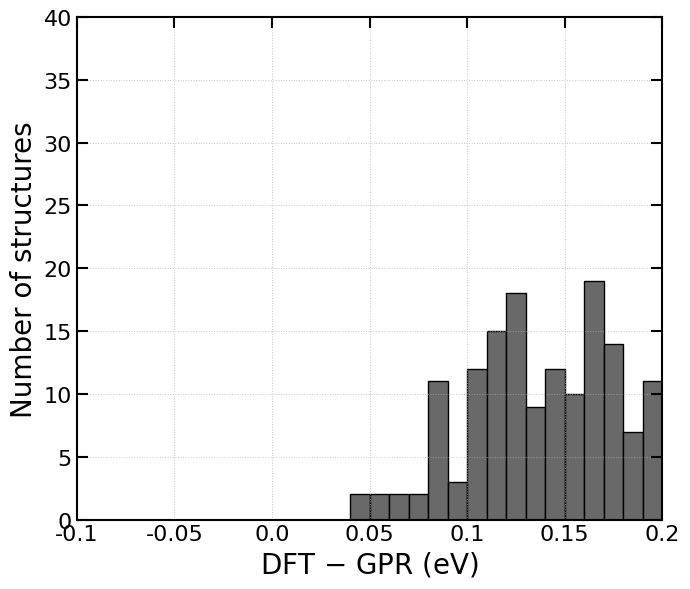

In [57]:
fig = plt.figure(figsize=(7, 6))
ax2 = fig.subplots()

font_x = {'size': 20, 'color': 'black'}
font_y = {'size': 20, 'color': 'black'}
font_tick = {'size': 16, 'color': 'black'}


# The second plot
counts, bins = np.histogram(diff, bins=30, range=(-0.1, 0.2))

ax2.hist(bins[:-1], bins, weights=counts, facecolor='dimgray', alpha=1.0, edgecolor='black')

ax2.set_xlabel("DFT $-$ GPR (eV)", fontdict=font_x)
ax2.set_xlim([-0.1, 0.2])
x_labels = [round(label, 2) for label in ax2.get_xticks()]
ax2.set_xticks(x_labels)
ax2.set_xlim([-0.1, 0.2])
ax2.set_xticklabels(x_labels, fontdict=font_tick)

ax2.set_ylabel("Number of structures", fontdict=font_y)
ax2.set_ylim([0, 40])
y_labels = [int(label) for label in ax2.get_yticks()]
# y_labels = [0, 20, 40, 60, 80, 100]
ax2.set_yticks(y_labels)
ax2.set_ylim([0, 40])
ax2.set_yticklabels(y_labels, fontdict=font_tick)

[x.set_linewidth(1.5) for x in ax2.spines.values()]
ax2.tick_params(bottom=False, top=True, left=True, right=True)
ax2.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax2.tick_params(direction='in', length=8, width=1.5)

ax2.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)

fig.tight_layout()
plt.show()

# 3-1. Train–Test (scale 1.5, weight 1.0)

Since, the constructed GPR with default parameters highly underestimate energy, let us change the parameters.

In [58]:
! sed -i '15s|.*|scale 1.5|' train.in

In [59]:
! cat train.in

# File path
Train_file ./2_EC-EC/train_set_tutorial/file_*.xsf
Test_file ./2_EC-EC/test_set_tutorial/file_*.xsf

# Train model save (default: False)
# Train_model_save True

# File format (default: xsf)
File_format xsf

# Descriptor (default: cartesian coordinates)
Descriptor cart

# Kernel parameter
scale 1.5
# weight 1.0

# Data process (default: batch, 25)
data_process batch
batch_size 25

# Flags for xsf file writing (default: False)
Train_write False
Test_write False
# Additional_write True

# Data augmentation parameter
# Disp_length 0.05
# Num_copy 5


In [60]:
! python -m aenet_gpr train.in

aenet-GPR: surrogate GPR for GPR-ANN indirect force training

2025-05-17 03:13:43.

Developed by In Won Yeu

This program performs three main steps:
1. Train: Generates a GPR model using the provided structure, energy, and force data.
2. Test: Uses the generated GPR model to predict values for the test set structures.
3. Augmentation: Performs data augmentation in xsf file format, compatible with aenet-(PyTorch),
supporting a GPR-ANN training in conjunction with aenet-(PyTorch).

Each of these steps is executed once the input file (train.in) contains the keywords:
Train_file [train file path]
Test_file [test file path]
Additional_write [True]


Train

Read reference training data

Time needed for reading data:            0.057534 s
Maximum CPU memory used:             0.538494 GB
Maximum GPU memory used:             0.000000 GB
Energy data size: (81,)  # (N_data, )
Force data size: (81, 20, 3)  # (N_data, N_atom, 3)
----------------------------------------------------------------------

By changing the scale parameter, energy error is significantly reduced from 0.165 eV to 0.037 eV.

# 3-2. Visualize the test results

In [61]:
energy_test_gpr = np.load("./energy_test_gpr.npy")
energy_test_reference = np.load("./energy_test_reference.npy")
force_test_gpr = np.load("./force_test_gpr.npy")
force_test_reference = np.load("./force_test_reference.npy")
uncertainty_test_gpr = np.load("./uncertainty_test_gpr.npy")

In [62]:
diff = energy_test_reference - energy_test_gpr

print(diff.min(), diff.max())

-0.07035813228139887 0.1360100667225197


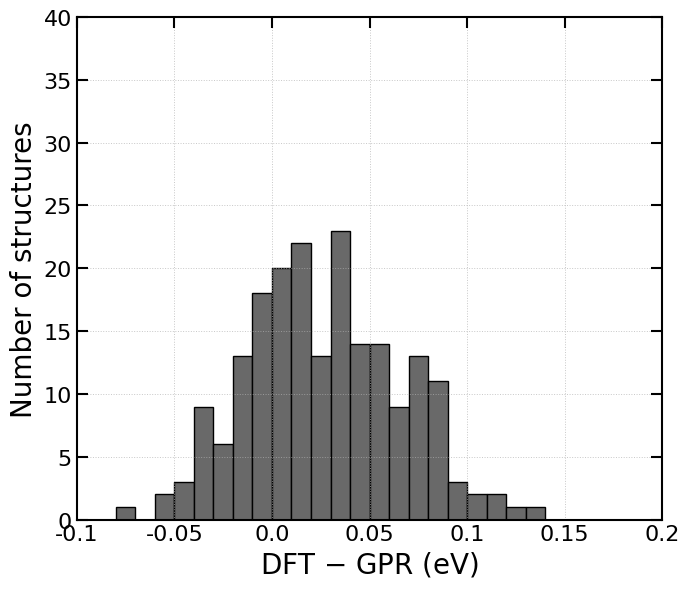

In [63]:
fig = plt.figure(figsize=(7, 6))
ax2 = fig.subplots()

font_x = {'size': 20, 'color': 'black'}
font_y = {'size': 20, 'color': 'black'}
font_tick = {'size': 16, 'color': 'black'}


# The second plot
counts, bins = np.histogram(diff, bins=30, range=(-0.1, 0.2))

ax2.hist(bins[:-1], bins, weights=counts, facecolor='dimgray', alpha=1.0, edgecolor='black')

ax2.set_xlabel("DFT $-$ GPR (eV)", fontdict=font_x)
ax2.set_xlim([-0.1, 0.2])
x_labels = [round(label, 2) for label in ax2.get_xticks()]
ax2.set_xticks(x_labels)
ax2.set_xlim([-0.1, 0.2])
ax2.set_xticklabels(x_labels, fontdict=font_tick)

ax2.set_ylabel("Number of structures", fontdict=font_y)
ax2.set_ylim([0, 40])
y_labels = [int(label) for label in ax2.get_yticks()]
# y_labels = [0, 20, 40, 60, 80, 100]
ax2.set_yticks(y_labels)
ax2.set_ylim([0, 40])
ax2.set_yticklabels(y_labels, fontdict=font_tick)

[x.set_linewidth(1.5) for x in ax2.spines.values()]
ax2.tick_params(bottom=False, top=True, left=True, right=True)
ax2.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False)
ax2.tick_params(direction='in', length=8, width=1.5)

ax2.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)

fig.tight_layout()
plt.show()

# 4. Augment

So, using these parameters, augment step will be executed.

In [64]:
! sed -i '3s|.*|# Test_file ./2_EC-EC/test_set_tutorial/file_*.xsf|' train.in
! sed -i '25s|.*|Additional_write True|' train.in
! sed -i '28s|.*|Disp_length 0.05|' train.in
! sed -i '29s|.*|Num_copy 5|' train.in

In [65]:
! cat train.in

# File path
Train_file ./2_EC-EC/train_set_tutorial/file_*.xsf
# Test_file ./2_EC-EC/test_set_tutorial/file_*.xsf

# Train model save (default: False)
# Train_model_save True

# File format (default: xsf)
File_format xsf

# Descriptor (default: cartesian coordinates)
Descriptor cart

# Kernel parameter
scale 1.5
# weight 1.0

# Data process (default: batch, 25)
data_process batch
batch_size 25

# Flags for xsf file writing (default: False)
Train_write False
Test_write False
Additional_write True

# Data augmentation parameter
Disp_length 0.05
Num_copy 5


In [66]:
! rm -rf additional_xsf/
! python -m aenet_gpr train.in

aenet-GPR: surrogate GPR for GPR-ANN indirect force training

2025-05-17 03:14:12.

Developed by In Won Yeu

This program performs three main steps:
1. Train: Generates a GPR model using the provided structure, energy, and force data.
2. Test: Uses the generated GPR model to predict values for the test set structures.
3. Augmentation: Performs data augmentation in xsf file format, compatible with aenet-(PyTorch),
supporting a GPR-ANN training in conjunction with aenet-(PyTorch).

Each of these steps is executed once the input file (train.in) contains the keywords:
Train_file [train file path]
Test_file [test file path]
Additional_write [True]


Train

Read reference training data

Time needed for reading data:            0.065266 s
Maximum CPU memory used:             0.539108 GB
Maximum GPU memory used:             0.000000 GB
Energy data size: (81,)  # (N_data, )
Force data size: (81, 20, 3)  # (N_data, N_atom, 3)
----------------------------------------------------------------------

Now, 405 new data have been augmented

In [67]:
! cd ./additional_xsf/ && ls

file_00000.xsf	file_00081.xsf	file_00162.xsf	file_00243.xsf	file_00324.xsf
file_00001.xsf	file_00082.xsf	file_00163.xsf	file_00244.xsf	file_00325.xsf
file_00002.xsf	file_00083.xsf	file_00164.xsf	file_00245.xsf	file_00326.xsf
file_00003.xsf	file_00084.xsf	file_00165.xsf	file_00246.xsf	file_00327.xsf
file_00004.xsf	file_00085.xsf	file_00166.xsf	file_00247.xsf	file_00328.xsf
file_00005.xsf	file_00086.xsf	file_00167.xsf	file_00248.xsf	file_00329.xsf
file_00006.xsf	file_00087.xsf	file_00168.xsf	file_00249.xsf	file_00330.xsf
file_00007.xsf	file_00088.xsf	file_00169.xsf	file_00250.xsf	file_00331.xsf
file_00008.xsf	file_00089.xsf	file_00170.xsf	file_00251.xsf	file_00332.xsf
file_00009.xsf	file_00090.xsf	file_00171.xsf	file_00252.xsf	file_00333.xsf
file_00010.xsf	file_00091.xsf	file_00172.xsf	file_00253.xsf	file_00334.xsf
file_00011.xsf	file_00092.xsf	file_00173.xsf	file_00254.xsf	file_00335.xsf
file_00012.xsf	file_00093.xsf	file_00174.xsf	file_00255.xsf	file_00336.xsf
file_00013.xsf	file_00094

Their structures are perturbed from original 81 training data and energy tags are predicted from the GPR model

In [71]:
! cd ./additional_xsf/ && cat file_00015.xsf

# total energy = -18640.4973891752706550 eV

ATOMS
O     9.92127264012626     6.50093407140779     12.21343868476982     -1.40968610275384     -4.27119480036642     0.24898704446125
O     8.55434133801045     5.33398729606598     13.56439517467360     -0.99608544815453     -1.29870448964641     -0.01850373800910
O     9.96668410450052     4.13716379839725     12.19240851779407     -0.99257130521901     0.83764078730432     0.62999014922648
C     9.21163311772355     7.35807652310095     13.03896851048356     4.49410382230976     5.95582137122621     -0.80782121841469
C     8.11732902172423     6.70417097223436     13.51979437043934     -3.28208043468046     -1.53412764590116     5.11070803874789
C     9.46074486196988     5.13865110141923     12.63028599980413     3.11266455125237     2.05527807148267     -1.56118475507608
H     8.99995460662451     8.27781993120021     12.39215806146194     0.00802976786000     -0.88432199881307     1.25404496522134
H     9.97459838724691     7.770379

In [72]:
! cd ./additional_xsf/ && cat file_00016.xsf

# total energy = -18639.3594662669020181 eV

ATOMS
O     9.95959613978480     6.48686255666783     12.27579619420268     -0.96232854448578     -3.39027573775400     0.47975975158044
O     8.52786261680040     5.31546185821189     13.38474167824307     -5.21957950772610     -1.77194637960515     4.33569797480286
O     9.99021099516644     4.17176415865194     12.10180838705334     -0.66185255204562     -1.89610333184996     0.52571486073615
C     9.27086036425622     7.44491599832899     13.04864414404875     -0.53463706753532     -0.24139733455103     -1.64580822468419
C     7.98035335527467     6.67162034302339     13.60287987246303     4.39100203453683     1.05450268300408     1.17694233134158
C     9.40333507829427     5.05246341537360     12.59339440932158     5.53125527322413     8.45770042505056     -3.43893571763010
H     9.02757547692622     8.33390200389502     12.39922656829425     0.31266570940911     -0.50144384048892     0.58198229103223
H     9.93499820840842     7.757237